----
----
# <center><b> DLMI Kaggle Challenge </center></b>
# <b> Matteo MARENGO | matteo.marengo@ens-paris-saclay.fr </b>
# <b> Manal MEFTAH | manal.meftah@ens-paris-saclay.fr </b>

----
----
# <b> Import libraries </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

from skimage.segmentation import slic
from skimage.color import label2rgb
from sklearn.cluster import KMeans
from skimage.morphology import closing, square

----
----
# <b> Do the segmentation using K-Means clustering </b>

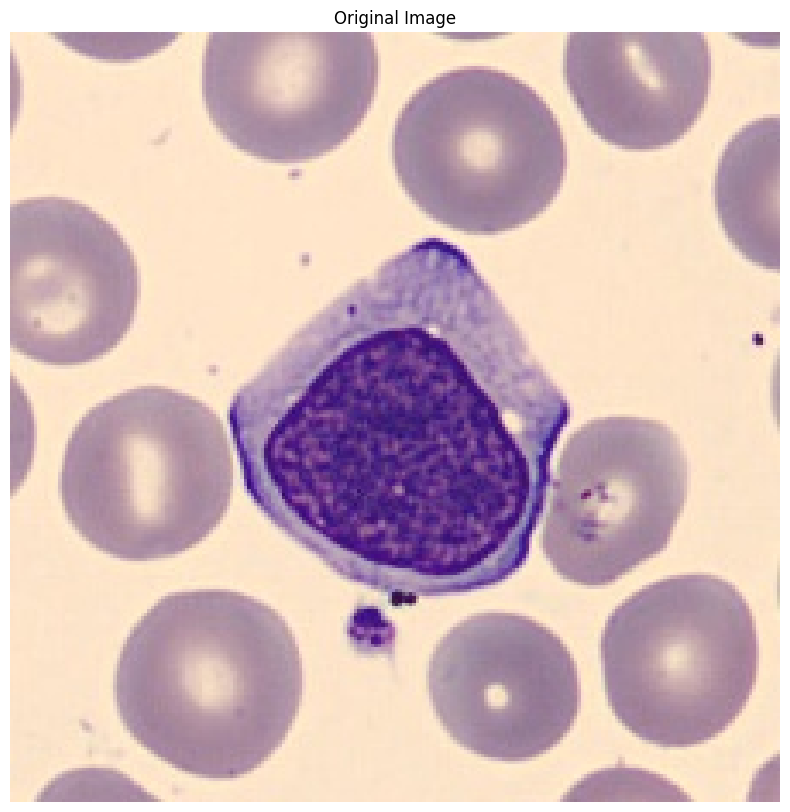

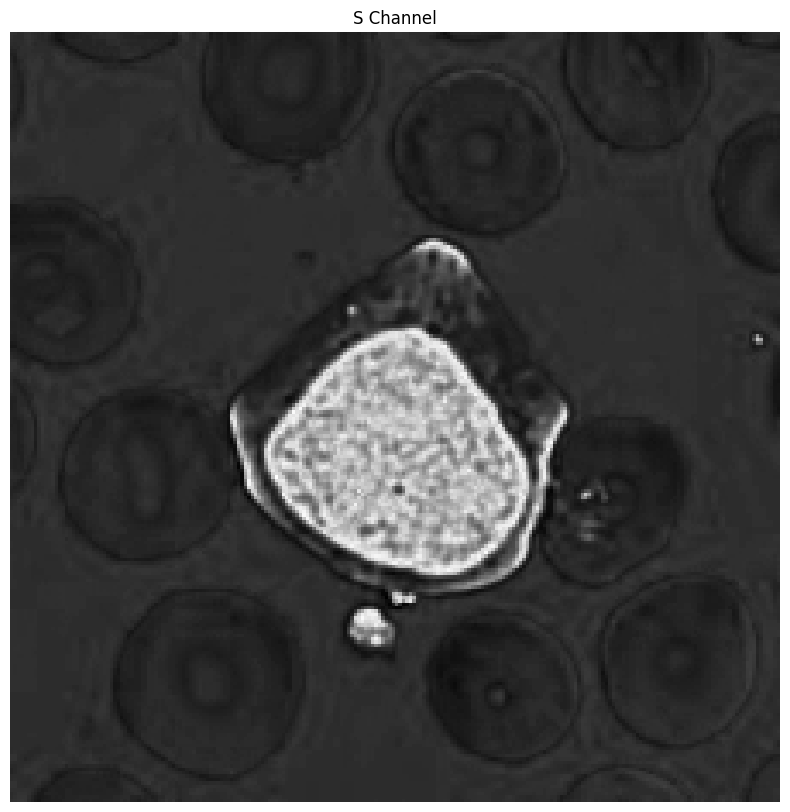

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


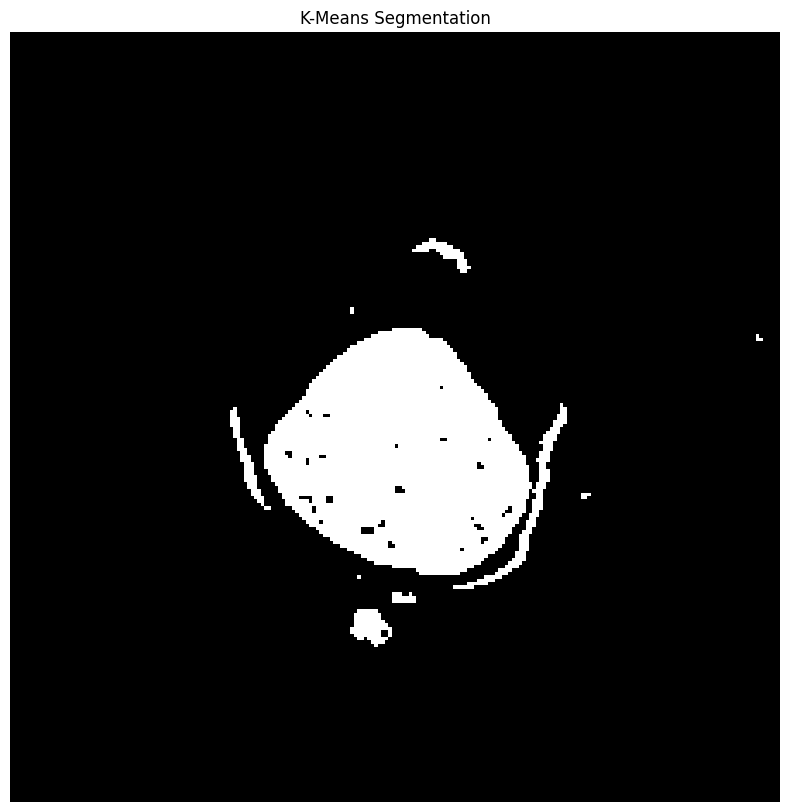

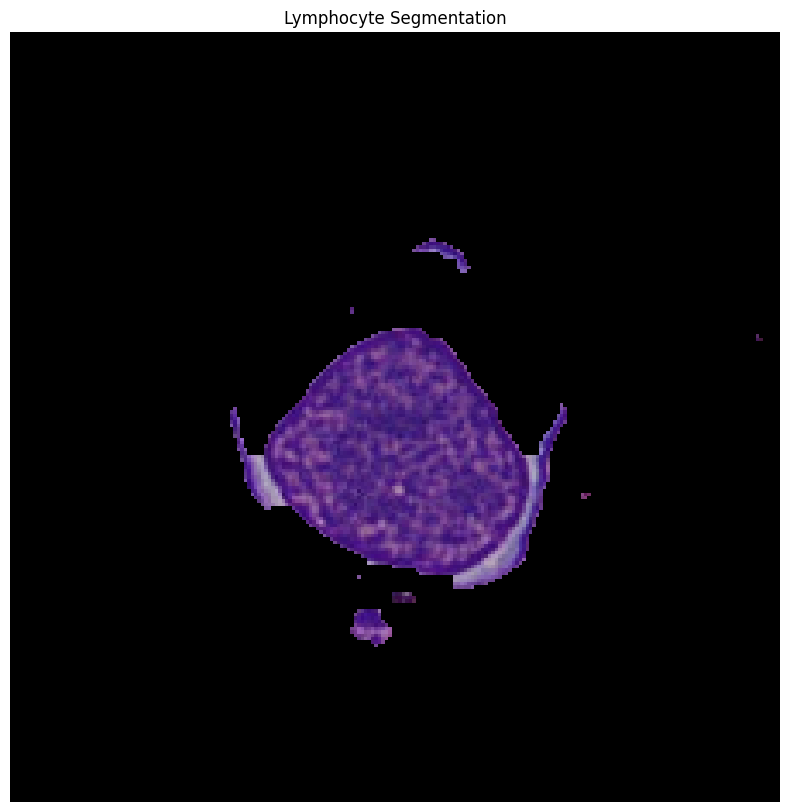

In [8]:
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = '/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P0/000009.jpg'
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
display_image(original_image_rgb, "Original Image")

# Convert to HSV and display the S channel
image_hsv = cv2.cvtColor(original_image_rgb, cv2.COLOR_RGB2HSV)
S_channel = image_hsv[:, :, 1]
display_image(S_channel, "S Channel", cmap='gray')

# Apply K-means clustering to the S channel
S_channel_flat = S_channel.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(S_channel_flat)
segmented_labels = kmeans.labels_.reshape(S_channel.shape)

# Display K-means segmentation result
display_image(segmented_labels, "K-Means Segmentation", cmap='gray')

# Determine which cluster corresponds to the lymphocyte based on mean saturation
cluster_mean_saturation = [S_channel_flat[segmented_labels.reshape(-1) == i].mean() for i in range(2)]
lymphocyte_cluster = np.argmax(cluster_mean_saturation)

# Generate a binary mask for the lymphocyte and apply morphological closing
binary_mask = (segmented_labels == lymphocyte_cluster).astype(np.uint8)
closed_mask = closing(binary_mask, square(5))

# Apply the mask to highlight the lymphocyte in the original image
segmented_image = original_image_rgb * closed_mask[:, :, np.newaxis]

# Display the final segmented image
display_image(segmented_image, "Lymphocyte Segmentation")


----
----
# <b> Do the segmentation using SLIC algorithm </b>

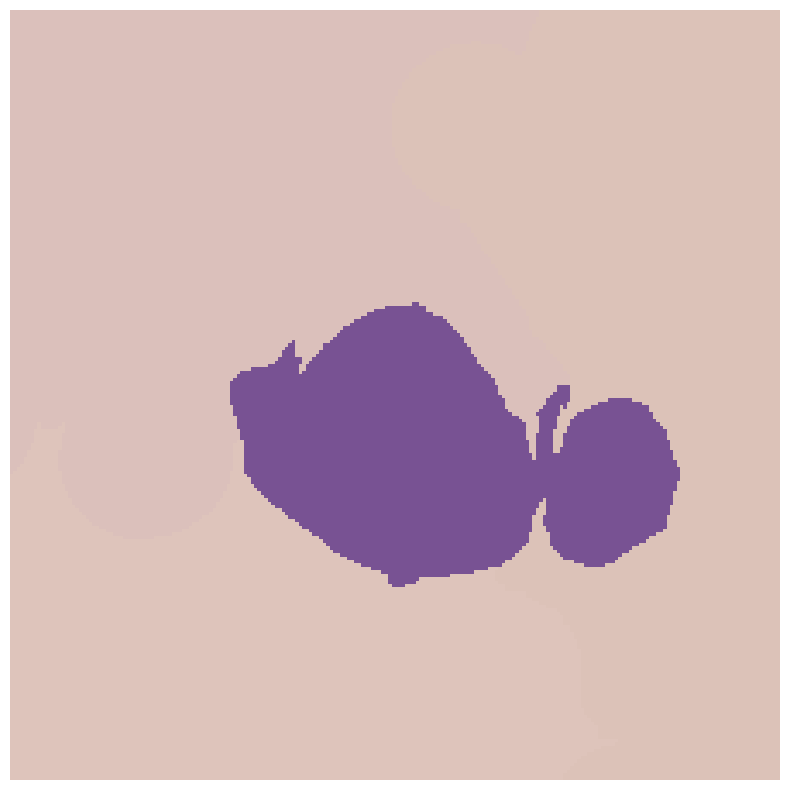

(224, 224, 3)


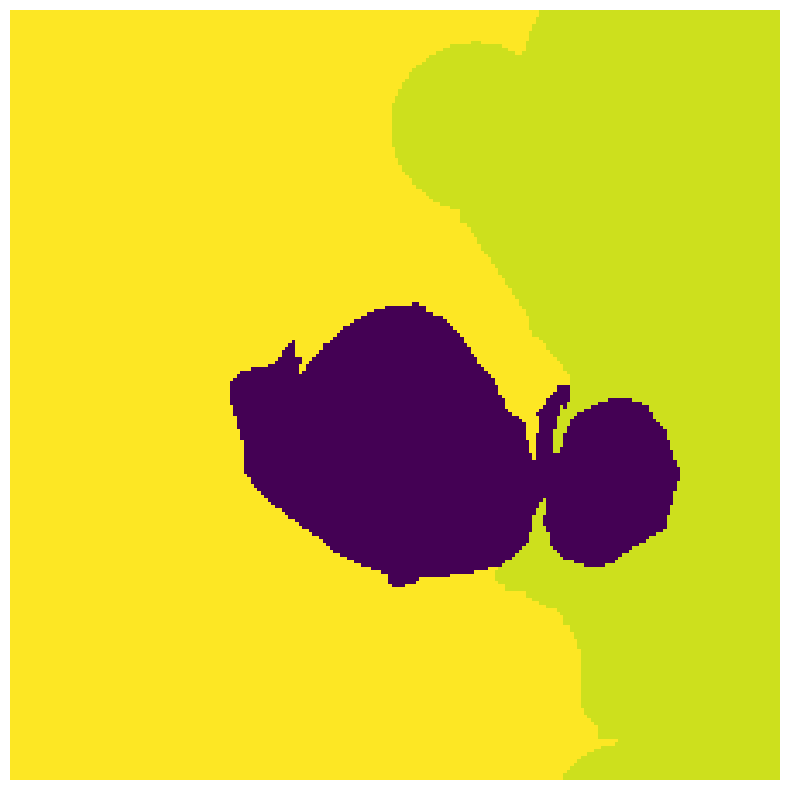

In [10]:
# Load the image 
image_path = '/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P0/000009.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Apply SLIC 
num_segments = 10
segments = slic(image, n_segments=num_segments, compactness=10, sigma=1)

segmented_image = label2rgb(segments, image, kind='avg')

plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.axis('off')  
plt.show()

# Convert the segmented RGB image to HSV
segmented_image_hsv = cv2.cvtColor(segmented_image.astype('float32'), cv2.COLOR_RGB2HSV)

segmented_image_display = cv2.cvtColor(segmented_image_hsv, cv2.COLOR_HSV2RGB)
print(segmented_image_display.shape)
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image_display[:,:,2])
plt.axis('off')
plt.show()
